Experiment 2
Generation of Pulse Code Modulation and its reconstruction.

In [12]:
# Libraries Required for the given experiment
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [20]:
#functions
#The purpose of this function is to 
def rounding(value):
    answer = mt.floor(value) + mt.ceil(value)
    return answer / 2

#The purpose of thisfunction is to provide with the quantized value of the signal
def Uniform_quantizater(input, bits):
    step_size = 2 * max(input) / (bits-1)
    Quantized_signal = [rounding(i / step_size) * step_size for i in input]
    return Quantized_signal



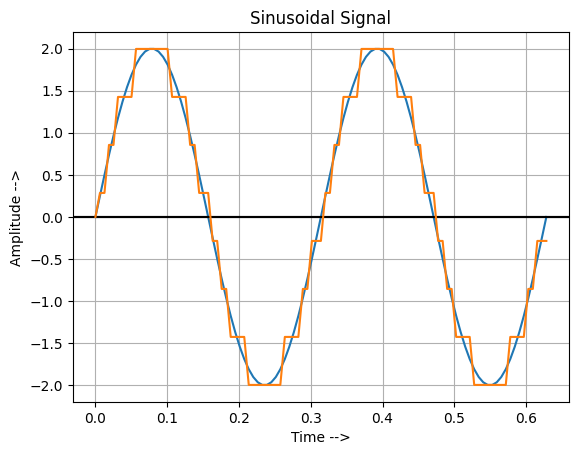

In [29]:
#Sinusoidal Signal
Amp = 2   #Amplitude of the sinusoidal signal
W_ss = 10 #Frequency of the sinusoidal signal

W_sampling = 1000 # According to Nyquist criteria W_samling>=2*W_ss

f_sampling = W_sampling / (2 * np.pi) 
T_sampling = 1 / f_sampling
t = np.arange(0, 100 * T_sampling, T_sampling)

#input signal
X = Amp * np.sin(2 * W_ss * t)
plt.plot(t,X)
plt.grid()
plt.title('Sinusoidal Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')
plt.axhline(y = 0, color = 'k')

# Quantized level
Quantized_signal = Uniform_quantizater(X,8)
plt.plot(t,Quantized_signal)


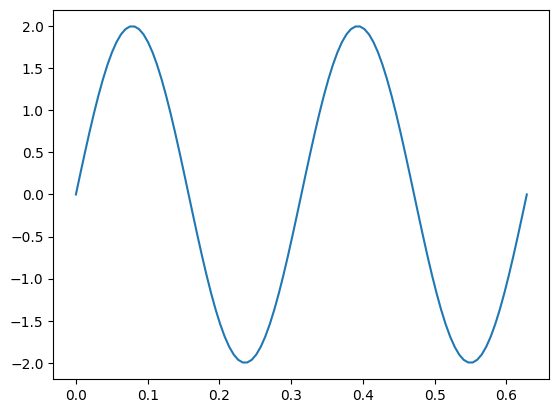

In [31]:
plt.plot(t,X)

In [19]:
input = [4.5,2,1]
arr = Uniform_quantizater(input,8)
arr

[4.5, 1.9285714285714288, 0.6428571428571429]